In [1]:
from skimage.io import imread
from napari_workflow_optimizer import SparseAnnotatedBinaryImageOptimizer, Workflow
import pyclesperanto_prototype as cle

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier0/_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
w = Workflow()
# define background subtraction
w.set("deblurred", cle.gaussian_blur, "input", sigma_x=5, sigma_y=5)
# define segmentation
w.set("binarized", cle.threshold_otsu, "deblurred")

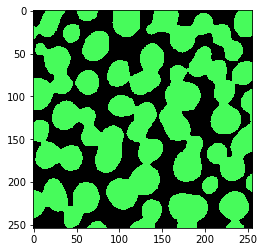

In [3]:
w.set("input", imread("blobs.tif"))
result = w.get("binarized")

cle.imshow(result, labels=True)

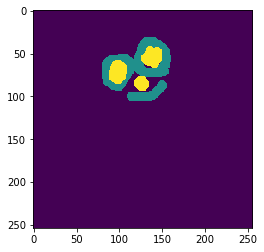

In [4]:
ground_truth = imread("blobs_annotated.tif")
cle.imshow(ground_truth)

 final_simplex: (array([[-6.05801326,  1.04895405,  0.00752049],
       [-6.38888889,  1.25      ,  0.00758333],
       [-5.48708276,  1.18844307,  0.00707545],
       [-4.74794239,  1.4367284 ,  0.0066466 ]]), array([-0.84920633, -0.84908658, -0.84908658, -0.84853292]))
           fun: -0.8492063283920288
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 38
           nit: 20
        status: 2
       success: False
             x: array([-6.05801326,  1.04895405,  0.00752049])


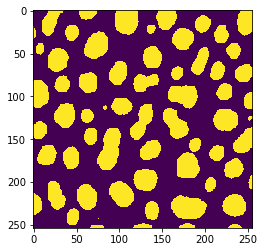

In [5]:
sabio = SparseAnnotatedBinaryImageOptimizer(w)
best_param = sabio.optimize("binarized", ground_truth, maxiter=20)
sabio.set_numeric_parameters(best_param)
cle.imshow(w.get("binarized"))

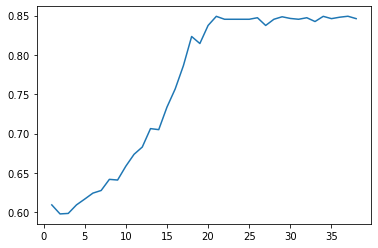

In [6]:
import matplotlib.pyplot as plt
attempt, quality = sabio.get_plot()

plt.plot(attempt, quality)